In [4]:
import random
import numpy as np
from memory_profiler import profile
import matplotlib.pyplot as plt
import multiprocessing as mp
import psutil
import time


# get matirx with size 1e6 * 1e3
def get_A():
    return np.random.rand(int(1e6), int(1e3))


# get matirx with size 1e3 * 1e6
def get_B():
    return np.random.rand(int(1e3), int(1e6))


# get matirx with size 1e6 * 1
def get_C():
    return np.random.rand(int(1e6), 1)

In [5]:
# plot the CDF
H, X1 = np.histogram(get_A(), bins=500)
dx = X1[1] - X1[0]
F1 = np.cumsum(H) * dx
plt.plot(X1[1:], F1)
plt.savefig('cumsum.png')

KeyboardInterrupt: 

In [ ]:
# record memory usage (output could be seen by run the .py file)

# @profile
def compute():
    # step 1, compute B * C first
    BC = np.dot(get_B(), get_C())
    # step 2, compute A * (B * C)
    return np.dot(get_A(), BC)

ABC = compute()


ERROR: Could not find file /var/folders/1z/hc87jcwj3_bbgvfnb8ndg16c0000gn/T/ipykernel_30721/289152215.py


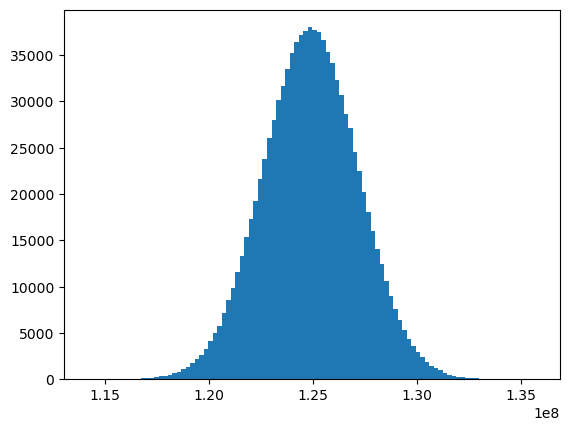

In [ ]:
# plot histogram of the result
plt.hist(ABC, bins=100)
plt.savefig('histogram.png')

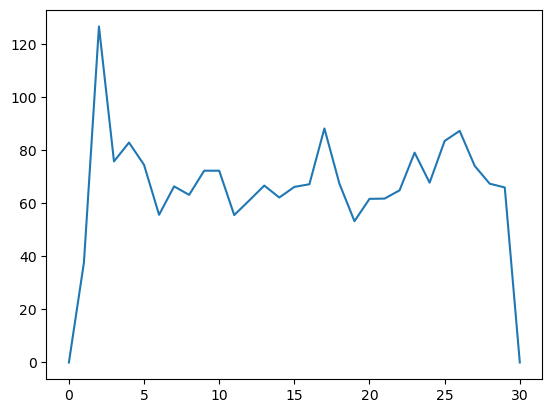

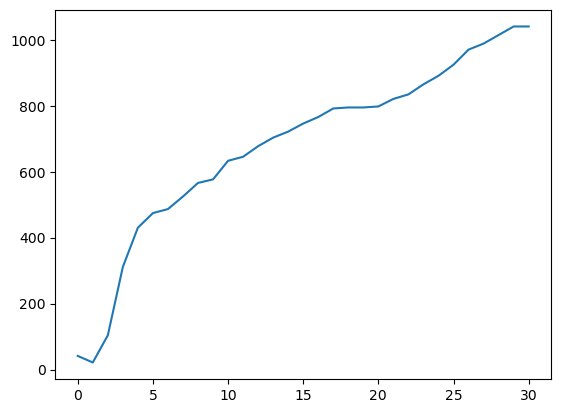

In [15]:
# in this chunk, we will use multiprocessing to monitor the CPU usage and plot it
def compute1():
    # step 1
    BC = np.dot(get_B(), get_C())
    # step 2
    ABC = np.dot(get_A(), BC)

def monitor(target):
    worker_process = mp.Process(target=target)
    worker_process.start()
    p = psutil.Process(worker_process.pid)

    # log cpu usage of `worker_process` every 10 ms
    cpu_percents = []
    mem_percents = []
    while worker_process.is_alive():
        try:
            cpu_percents.append(p.cpu_percent())
            mem_percents.append(p.memory_percent() * 16000) # my computer has 16GB RAM
            time.sleep(0.001)
        except Exception as e:
            print(e)
            break

    worker_process.join()
    return cpu_percents, mem_percents


cpu_percents, mem_percents = monitor(target=compute1())

plt.plot(cpu_percents)
plt.savefig('CPU_plot.png')
plt.figure()
plt.plot(mem_percents)
plt.savefig('MEM_plot.png')